<a href="https://colab.research.google.com/github/ajrianop/Estadistica_Descriptiva_y_Python_UD2023-3/blob/main/05_2_Regresion_Lineal_Multiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regresión Lineal Multiple**

Para cargar un dataset de drive:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Herramientas a utilizar de Scikit Learn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score

Para realizar un modelo de regresión multiple es necesario tener varias variables independientes y una variable que dependa de ellas. De este modo, nuestras variables independientes serán las características (features) del problema y la variable dependiente será nuestro objetivo (target). Para el presente desarrollo observaremos una base de datos descargada de Kaggle.

De igual modo utilizaremos la matriz asociada a las ecuaciones normales de estimación para encontrar nuestra recta descrita por el proceso de regresión lineal, esto quiere decir que debemos encontrar $\beta_0, \beta_1, \ldots , \beta_n,$ para la recta
$$y=\beta_0 + \beta_1 x_1+ \cdots + \beta_n x_n.$$

In [3]:
## Ejemplo para hacer calculo de soluciones utilizando algebra lineal:
import numpy as np
A = np.matrix([[2, 3],[1, -2]])
b = np.matrix([[8],[-10]])
x = (A**-1)*b

Vamos a llamar el dataset del drive utilizando el siguiente comando:

In [4]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Estadística/data_co2.csv')
df.head()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [5]:
len(df)

36

Podemos notar que el dataset contiene el tipo de carro `"Car"` , el modelo del automovil `"Model"`,  el volumen del automovil como `"Volume"` , el peso como `"Weight"` y por ultimo las emisiones de CO2 como `"CO2"`.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Car     36 non-null     object
 1   Model   36 non-null     object
 2   Volume  36 non-null     int64 
 3   Weight  36 non-null     int64 
 4   CO2     36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB


In [7]:
df.columns

Index(['Car', 'Model', 'Volume', 'Weight', 'CO2'], dtype='object')

Para realizar el análisis del problema vamos a determinar cuales son las variables numericas para poder compararlas y generar el modelo de regresión, de este consideramos:
`'Volume', 'Weight', 'CO2'`

Donde las variables independientes son:
`X => 'Volume', 'Weight'`
y la variable dependiente es:
`y => 'CO2'`

In [8]:
# Fijamos los valores de X y y
X = df[['Weight', 'Volume']]
y = df['CO2']

In [9]:
X.head()

,Weight,Volume
0,790,1000
1,1160,1200
2,929,1000
3,865,900
4,1140,1500


In [10]:
y.head()

0     99
1     95
2     95
3     90
4    105
Name: CO2, dtype: int64

Se plantea un gráfico de distribuciones del problema

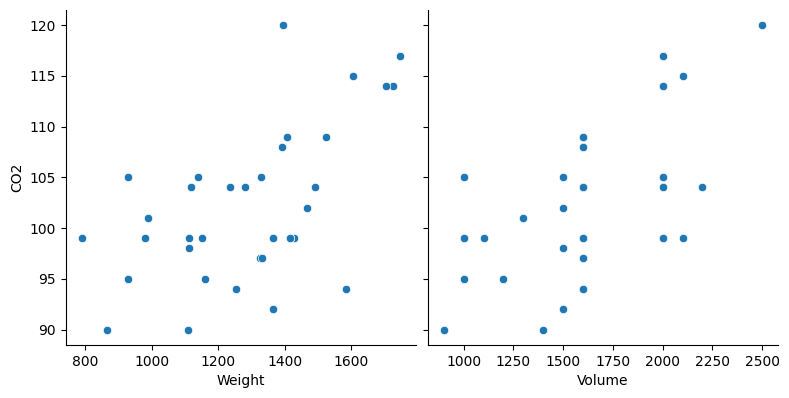

In [11]:
sns.pairplot(df, x_vars=['Weight', 'Volume'], y_vars='CO2', height=4, aspect=1, kind='scatter')
plt.show()

Descripción de la distribución de los datos utilizando diagramas de caja (Whisker plot)

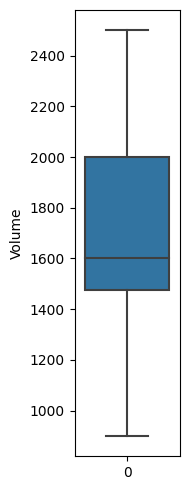

In [12]:
fig = plt.figure(figsize = (2,5))
plt2 = sns.boxplot(df['Volume'])
plt.ylabel('Volume')
plt.tight_layout()

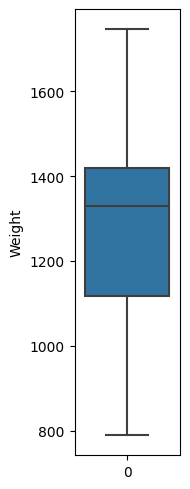

In [13]:
fig = plt.figure(figsize = (2,5))
plt1 = sns.boxplot(df['Weight'])
plt.ylabel('Weight')
plt.tight_layout()

## **Modelo de regresión lineal manual**

Se tienen que calcular los coeficientes de las ecuaciones normales de
estimación para la regresión lineal múltiple.
Para esto notamos que nuestro problema tiene 2 variables independientes y una variable dependiente, de esta manera tendremos una matriz $3\times 3$

In [14]:
df['Volume**2'] = df['Volume'] * df['Volume']
df['Weight**2'] = df['Weight'] * df['Weight']
df['Volume*Weight'] = df['Volume'] * df['Weight']
df['Volume*CO2'] = df['Volume'] * df['CO2']
df['Weight*CO2'] = df['CO2'] * df['Weight']

In [15]:
df

,Car,Model,Volume,Weight,CO2,Volume**2,Weight**2,Volume*Weight,Volume*CO2,Weight*CO2
0,Toyoty,Aygo,1000,790,99,1000000,624100,790000,99000,78210
1,Mitsubishi,Space Star,1200,1160,95,1440000,1345600,1392000,114000,110200
2,Skoda,Citigo,1000,929,95,1000000,863041,929000,95000,88255
3,Fiat,500,900,865,90,810000,748225,778500,81000,77850
4,Mini,Cooper,1500,1140,105,2250000,1299600,1710000,157500,119700
5,VW,Up!,1000,929,105,1000000,863041,929000,105000,97545
6,Skoda,Fabia,1400,1109,90,1960000,1229881,1552600,126000,99810
7,Mercedes,A-Class,1500,1365,92,2250000,1863225,2047500,138000,125580
8,Ford,Fiesta,1500,1112,98,2250000,1236544,1668000,147000,108976
9,Audi,A1,1600,1150,99,2560000,1322500,1840000,158400,113850


In [16]:
a11 = len(df)
a12 = df['Volume'].sum()
a13 = df['Weight'].sum()
a21 = df['Volume'].sum()
a22 = df['Volume**2'].sum()
a23 = df['Volume*Weight'].sum()
a31 = df['Weight'].sum()
a32 = df['Volume*Weight'].sum()
a33 = df['Weight**2'].sum()
Y1 = df['CO2'].sum()
Y2 = df['Volume*CO2'].sum()
Y3 = df['Weight*CO2'].sum()

A = A = np.matrix([[a11, a12, a13],[a21, a22, a23],[a31, a32, a33]])
Y = np.matrix([[Y1],[Y2],[Y3]])
B = (A**-1)*Y
# Los coeficientes de la regresión lineal son:
#Intercepto
print('Intercepto: ', B[0,0])
print('Coeficiente de "Volume": ', B[1,0])
print('Coeficiente de "Weight": ', B[2,0])

Intercepto:  79.69471929115939
Coeficiente de "Volume":  0.0078052575277468865
Coeficiente de "Weight":  0.007550947270301471


In [17]:
A

matrix([[      36,    58000,    46522],
        [   58000, 98740000, 77436000],
        [   46522, 77436000, 62171186]])

In [18]:
Y

matrix([[   3673],
        [5977700],
        [4781417]])

In [19]:
B

matrix([[7.96947193e+01],
        [7.80525753e-03],
        [7.55094727e-03]])

Así la predicción de la variable `"CO2"` sería dada por
$CO2 = \beta_0 + \beta_1 Volume + \beta_2 Weight$

In [20]:
df['y_predict'] = B[0,0] +  B[1,0] * df['Volume'] + B[2,0] * df['Weight']
df

,Car,Model,Volume,Weight,CO2,Volume**2,Weight**2,Volume*Weight,Volume*CO2,Weight*CO2,y_predict
0,Toyoty,Aygo,1000,790,99,1000000,624100,790000,99000,78210,93.465225
1,Mitsubishi,Space Star,1200,1160,95,1440000,1345600,1392000,114000,110200,97.820127
2,Skoda,Citigo,1000,929,95,1000000,863041,929000,95000,88255,94.514807
3,Fiat,500,900,865,90,810000,748225,778500,81000,77850,93.251020
4,Mini,Cooper,1500,1140,105,2250000,1299600,1710000,157500,119700,100.010685
5,VW,Up!,1000,929,105,1000000,863041,929000,105000,97545,94.514807
6,Skoda,Fabia,1400,1109,90,1960000,1229881,1552600,126000,99810,98.996080
7,Mercedes,A-Class,1500,1365,92,2250000,1863225,2047500,138000,125580,101.709649
8,Ford,Fiesta,1500,1112,98,2250000,1236544,1668000,147000,108976,99.799259
9,Audi,A1,1600,1150,99,2560000,1322500,1840000,158400,113850,100.866721


In [21]:
_mean = df['CO2'].mean()
df['diff_y_predict^2'] = (df['CO2'] - df['y_predict'])**2
df['diff_y_mean^2'] = (df['CO2'] - _mean)**2
R2 = 1 - (df['diff_y_predict^2'].sum() / df['diff_y_mean^2'].sum())

# Descripcion del R2
print(f'El R2 del modelo es : {R2}')

El R2 del modelo es : 0.3765564043619989


## **Modelo de regresión lineal utilizando herramientas de Machine Learning**

In [22]:
# Se enuncia el modelo a utilizar
modelo_regresion =linear_model.LinearRegression()

# Se entrena el modelo
modelo_regresion = modelo_regresion.fit(X, y)

# Los coeficientes del modelo son:
#Intercepto
print('Intercepto: ',modelo_regresion.intercept_)
# Coeficientes variables independientes
list(zip(X, modelo_regresion.coef_))

Intercepto:  79.69471929115939


[('Weight', 0.0075509472703006895), ('Volume', 0.007805257527747124)]

In [23]:
# Predicción del modelo
y_pred= modelo_regresion.predict(X)

df['prediccion_CO2'] = y_pred
df

,Car,Model,Volume,Weight,CO2,Volume**2,Weight**2,Volume*Weight,Volume*CO2,Weight*CO2,y_predict,diff_y_predict^2,diff_y_mean^2,prediccion_CO2
0,Toyoty,Aygo,1000,790,99,1000000,624100,790000,99000,78210,93.465225,30.633733,9.167438,93.465225
1,Mitsubishi,Space Star,1200,1160,95,1440000,1345600,1392000,114000,110200,97.820127,7.953117,49.389660,97.820127
2,Skoda,Citigo,1000,929,95,1000000,863041,929000,95000,88255,94.514807,0.235412,49.389660,94.514807
3,Fiat,500,900,865,90,810000,748225,778500,81000,77850,93.251020,10.569134,144.667438,93.251020
4,Mini,Cooper,1500,1140,105,2250000,1299600,1710000,157500,119700,100.010685,24.893259,8.834105,100.010685
5,VW,Up!,1000,929,105,1000000,863041,929000,105000,97545,94.514807,109.939276,8.834105,94.514807
6,Skoda,Fabia,1400,1109,90,1960000,1229881,1552600,126000,99810,98.996080,80.929462,144.667438,98.996080
7,Mercedes,A-Class,1500,1365,92,2250000,1863225,2047500,138000,125580,101.709649,94.277276,100.556327,101.709649
8,Ford,Fiesta,1500,1112,98,2250000,1236544,1668000,147000,108976,99.799259,3.237333,16.222994,99.799259
9,Audi,A1,1600,1150,99,2560000,1322500,1840000,158400,113850,100.866721,3.484646,9.167438,100.866721


Podemos determinar los scores importantes para el modelo con:

In [29]:
mae = metrics.mean_absolute_error(y, y_pred)
mse = metrics.mean_squared_error(y, y_pred)
r2 = r2_score(y,y_pred)

print('Error absoluto medio (Mean Absolute Error):', mae)
print('Suma de errores cuadrados (Mean Square Error):', mse)
print('R2 o coeficiente de determinación (Root Mean Square Error):', r2)

Error absoluto medio (Mean Absolute Error): 5.075498597144507
Suma de errores cuadrados (Mean Square Error): 33.68279098995154
R2 o coeficiente de determinación (Root Mean Square Error): 0.3765564043619989


In [26]:
'''
PARA GENERAR UNA FUNCION GENERAL TENEMOS QUE VER VARIOS CASOS Y REQUIERE TIEMPO PARA EL PLANTEAMIENTO DE LA MATRIZ
def matriz_reg_lin(df , comentario):
  '''
'''  Creación de coeficientes de regresión lineal para el dataframe df.
  Parametros:
  df --> DataFrame
  comentario --> str : descripción del tipo de regresión
  '''
'''  longitud_columnas = len(df.columns)  # valor
  longitud_filas = len(df)

  for i in range(longitud_columnas):
    lista_i = []
    _sumi = 0
    if i= 0:
      for j in range(longitud_filas):

        lista_i.append()
'''

'  longitud_columnas = len(df.columns)  # valor\n  longitud_filas = len(df)\n\n  for i in range(longitud_columnas):\n    lista_i = []\n    _sumi = 0\n    if i= 0:\n      for j in range(longitud_filas):\n\n        lista_i.append()\n'